In [13]:
import pandas as pd
df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/sonar.csv")

In [14]:
dum_df = pd.get_dummies(df,drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [16]:
X = dum_df.iloc[:,:-1]
y = dum_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

In [18]:
model_rf = RandomForestClassifier(random_state=1211,
                                  n_estimators=500,oob_score=True)
model_rf.fit( X_train , y_train )
y_pred = model_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[31  3]
 [11 18]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        34
           1       0.86      0.62      0.72        29

    accuracy                           0.78        63
   macro avg       0.80      0.77      0.77        63
weighted avg       0.79      0.78      0.77        63

0.7777777777777778


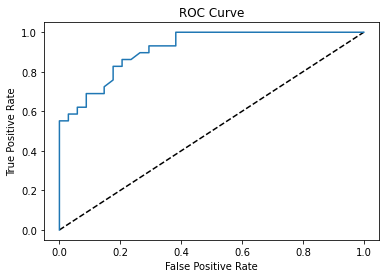

0.9158215010141988

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

V1 = 0.02167788841054022
V2 = 0.006267483363131544
V3 = 0.009435383142343523
V4 = 0.0266696541855012
V5 = 0.026627346145598266
V6 = 0.02177846481555865
V7 = 0.01254233257470035
V8 = 0.009499761176232035
V9 = 0.04389208742166096
V10 = 0.03749917369739204
V11 = 0.07155056330765576
V12 = 0.05204679984929999
V13 = 0.015961181525258918
V14 = 0.011107664654131351
V15 = 0.014702239522348488
V16 = 0.013255385339894156
V17 = 0.01682830458479686
V18 = 0.014171816910716646
V19 = 0.011462325350363322
V20 = 0.01748090678452198
V21 = 0.02276918389584142
V22 = 0.014277246123370472
V23 = 0.01161973321616213
V24 = 0.010071344942889022
V25 = 0.007835417868338341
V26 = 0.008423555335097047
V27 = 0.010204407426095284
V28 = 0.013135716027824804
V29 = 0.00932621147363694
V30 = 0.011801820549506419
V31 = 0.012396658452057318
V32 = 0.013745179930658349
V33 = 0.010640985196293452
V34 = 0.007707616986959753
V35 = 0.008656838739100657
V36 = 0.014293343894365635
V37 = 0.01623455170100031
V38 = 0.00807807208382035

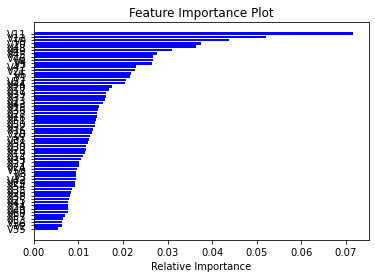

In [7]:
##########################Feature Importance########################
for name, importance in zip(X.columns, model_rf.feature_importances_):
    print(name, "=", importance)

import numpy as np    
features = X.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance Plot')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [8]:
#####################Out of Bag Error###############################
print(model_rf.oob_score_)

0.7862068965517242


In [9]:

#################### Grid Search CV ################################
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'max_features': np.arange(1,11)}

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

model_rf = RandomForestClassifier(random_state=1211)
cv = GridSearchCV(model_rf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit( X , y )

results_df = pd.DataFrame(cv.cv_results_  )

print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

best_model = cv.best_estimator_

{'max_features': 3}
0.9340987102142708
RandomForestClassifier(max_features=3, random_state=1211)


V1 = 0.01399816898214234
V2 = 0.009802063037734506
V3 = 0.010400561024864296
V4 = 0.019398561852524778
V5 = 0.02265752204633743
V6 = 0.015885677441872508
V7 = 0.008269204985289534
V8 = 0.013048589814387722
V9 = 0.037685413975213855
V10 = 0.03650970347366597
V11 = 0.03629490418078456
V12 = 0.03855759220481303
V13 = 0.03162653187290054
V14 = 0.01902288473267737
V15 = 0.01249449512249078
V16 = 0.01629739906992533
V17 = 0.012608114956669598
V18 = 0.015819342389418258
V19 = 0.014493229764602817
V20 = 0.017557123333682687
V21 = 0.012764101529751262
V22 = 0.015772075677029127
V23 = 0.014821762079399291
V24 = 0.009784219162417404
V25 = 0.008423730373183974
V26 = 0.013982292017415817
V27 = 0.010434751698186941
V28 = 0.01963257124586629
V29 = 0.013439882431069018
V30 = 0.013651662118461545
V31 = 0.022858519407323277
V32 = 0.011405324415276053
V33 = 0.012329844999138428
V34 = 0.014803837994156568
V35 = 0.013297714903926937
V36 = 0.027690568864342475
V37 = 0.02330360225117709
V38 = 0.0085037535199

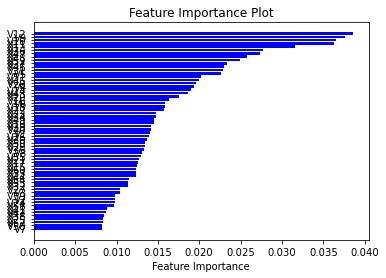

In [10]:
##########################Feature Importance########################
for name, importance in zip(X.columns, best_model.feature_importances_):
    print(name, "=", importance)

import numpy as np    
features = X.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance Plot')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()